In [3]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import random

# Generate Synthetic Dataset
def generate_lattice_graph(num_nodes=10):
    edge_index = torch.randint(0, num_nodes, (2, num_nodes * 2))  # Random connections
    x = torch.rand(num_nodes, 3)  # Random node features (e.g., positions)
    y = torch.tensor([random.uniform(1e3, 1e5)])  # Random Young's modulus
    return Data(x=x, edge_index=edge_index, y=y)

# Create a dataset
dataset = [generate_lattice_graph() for _ in range(1000)]
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define GNN Model
class LatticeGNN(torch.nn.Module):
    def __init__(self):
        super(LatticeGNN, self).__init__()
        self.conv1 = GCNConv(3, 16)  # Input features = 3, output = 16
        self.conv2 = GCNConv(16, 32)
        self.fc1 = torch.nn.Linear(32, 16)
        self.fc2 = torch.nn.Linear(16, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  # Pooling to get graph-level representation
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Model, Optimizer, and Loss
model = LatticeGNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# Training Loop
for epoch in range(50):
    model.train()
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader):.4f}")


C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This 

Epoch 1, Loss: 3507219140.0000
Epoch 2, Loss: 3511237648.0000
Epoch 3, Loss: 2888221136.0000
Epoch 4, Loss: 1349810094.0000
Epoch 5, Loss: 865168218.0000
Epoch 6, Loss: 867610952.0000
Epoch 7, Loss: 868662044.0000
Epoch 8, Loss: 870215190.0000
Epoch 9, Loss: 865922934.0000
Epoch 10, Loss: 862422796.0000
Epoch 11, Loss: 869019176.0000
Epoch 12, Loss: 859268017.0000
Epoch 13, Loss: 861997022.0000
Epoch 14, Loss: 863929106.0000
Epoch 15, Loss: 864225394.0000
Epoch 16, Loss: 859291766.0000
Epoch 17, Loss: 875837454.0000
Epoch 18, Loss: 859199510.0000
Epoch 19, Loss: 863065634.0000
Epoch 20, Loss: 858742962.0000
Epoch 21, Loss: 866087644.0000
Epoch 22, Loss: 856303630.0000
Epoch 23, Loss: 871905062.0000
Epoch 24, Loss: 867783612.0000
Epoch 25, Loss: 856007357.0000
Epoch 26, Loss: 864425478.0000
Epoch 27, Loss: 855372304.0000
Epoch 28, Loss: 861800032.0000
Epoch 29, Loss: 856331244.0000
Epoch 30, Loss: 856845930.0000
Epoch 31, Loss: 858794762.0000
Epoch 32, Loss: 864659034.0000
Epoch 33, Los

Epoch 100, Loss: 0.9772
Epoch 200, Loss: 0.9259
Epoch 300, Loss: 0.8956
Epoch 400, Loss: 0.8829
Epoch 500, Loss: 0.8775
Epoch 600, Loss: 0.8754
Epoch 700, Loss: 0.8738
Epoch 800, Loss: 0.8728
Epoch 900, Loss: 0.8720
Epoch 1000, Loss: 0.8709
Epoch 1100, Loss: 0.8696
Epoch 1200, Loss: 0.8694
Epoch 1300, Loss: 0.8689
Epoch 1400, Loss: 0.8680
Epoch 1500, Loss: 0.8671
Epoch 1600, Loss: 0.8661
Epoch 1700, Loss: 0.8651
Epoch 1800, Loss: 0.8637
Epoch 1900, Loss: 0.8629
Epoch 2000, Loss: 0.8621


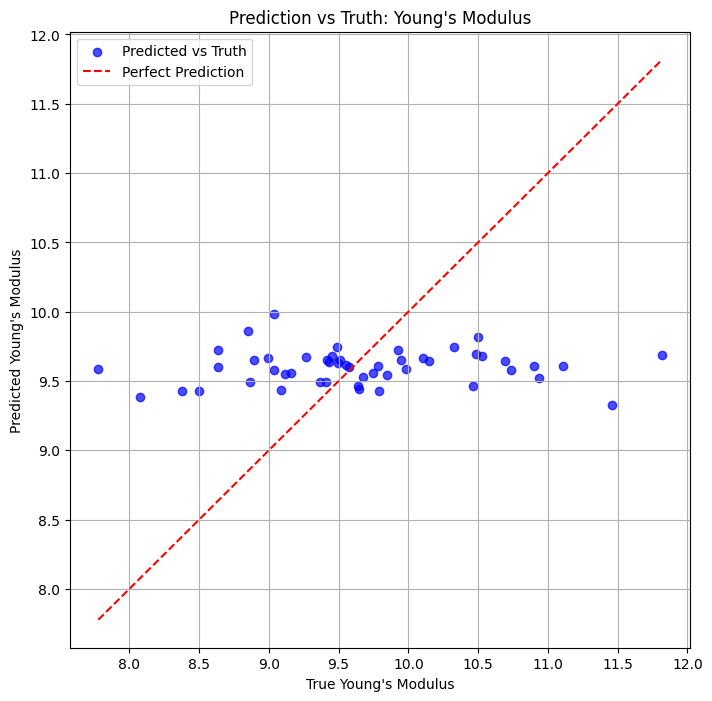

In [18]:
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import random
import torch.nn.functional as F

def generate_meaningful_lattice_graph(num_nodes=10):
    edge_index = torch.randint(0, num_nodes, (2, num_nodes * 2))  # Random connections
    x = torch.rand(num_nodes, 3)  # Random node features (e.g., positions)
    
    # Create a meaningful relationship for `y` as a function of node features
    # For example, we use the sum of node feature norms as a proxy for Young's modulus
    y = torch.tensor([torch.sum(torch.norm(x, dim=1)).item()])  # Sum of norms of node features
    
    return Data(x=x, edge_index=edge_index, y=y)

# Generate a dataset with 200 samples
dataset = [generate_meaningful_lattice_graph() for _ in range(200)]
train_loader = DataLoader(dataset[:150], batch_size=32, shuffle=False)  # Training set
test_loader = DataLoader(dataset[150:], batch_size=32, shuffle=False)  # Test set

# Define GNN Model
class LatticeGNN(torch.nn.Module):
    def __init__(self):
        super(LatticeGNN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.fc1 = torch.nn.Linear(32, 16)
        self.fc2 = torch.nn.Linear(16, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Model, Optimizer, Loss Function
model = LatticeGNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# Training Loop
for epoch in range(2000):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1)%100==0:
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation and Visualization
model.eval()
true_vals = []
pred_vals = []

with torch.no_grad():
    for data in test_loader:
        pred = model(data)
        true_vals.extend(data.y.tolist())
        pred_vals.extend(pred.squeeze().tolist())

# Plot Predicted vs Truth
plt.figure(figsize=(8, 8))
plt.scatter(true_vals, pred_vals, color='blue', alpha=0.7, label="Predicted vs Truth")
plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--', label="Perfect Prediction")
plt.xlabel("True Young's Modulus")
plt.ylabel("Predicted Young's Modulus")
plt.title("Prediction vs Truth: Young's Modulus")
plt.legend()
plt.grid()
plt.show()


In [13]:
print(data.y.shape)
print(data.x.shape)

torch.Size([18])
torch.Size([180, 3])


In [17]:
import torch
import random
from torch_geometric.data import Data

# Generate meaningful synthetic dataset
# Here we create `y` as a function of `x` to have a meaningful relationship.

def generate_meaningful_lattice_graph(num_nodes=10):
    edge_index = torch.randint(0, num_nodes, (2, num_nodes * 2))  # Random connections
    x = torch.rand(num_nodes, 3)  # Random node features (e.g., positions)
    
    # Create a meaningful relationship for `y` as a function of node features
    # For example, we use the sum of node feature norms as a proxy for Young's modulus
    y = torch.tensor([torch.sum(torch.norm(x, dim=1)).item()])  # Sum of norms of node features
    
    return Data(x=x, edge_index=edge_index, y=y)

# Generate a dataset with 200 samples
dataset = [generate_meaningful_lattice_graph() for _ in range(200)]

# Display a sample data.x and data.y to verify
sample_data = dataset[0]
print("Sample node features (x):", sample_data.x)
print("Sample target (y):", sample_data.y)


Sample node features (x): tensor([[0.7906, 0.9801, 0.1044],
        [0.5045, 0.5067, 0.9378],
        [0.6153, 0.2999, 0.3306],
        [0.1851, 0.4123, 0.2953],
        [0.2958, 0.2662, 0.7657],
        [0.8393, 0.2233, 0.2804],
        [0.2358, 0.5987, 0.0678],
        [0.5059, 0.8420, 0.5019],
        [0.8538, 0.6597, 0.0444],
        [0.1041, 0.9270, 0.4087]])
Sample target (y): tensor([9.3669])


In [19]:
import networkx as nx
import torch
from torch_geometric.utils import from_networkx

# Create a 2D lattice graph
G = nx.grid_2d_graph(3, 3)  # 3x3 grid lattice

# Assign node features (e.g., coordinates)
for node in G.nodes:
    G.nodes[node]['feature'] = torch.tensor([node[0], node[1]])  # Coordinates (x, y)

# Convert to PyTorch Geometric format
data = from_networkx(G, group_node_attrs=["feature"])
print("Node features:", data.x)
print("Edge index:", data.edge_index)


Node features: tensor([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2]])
Edge index: tensor([[0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8],
        [3, 1, 4, 0, 2, 5, 1, 0, 6, 4, 1, 7, 3, 5, 2, 8, 4, 3, 7, 4, 6, 8, 5, 7]])
